In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/MyDrive/RSP'
images=glob.glob(image_path + "/*.jpg")  

In [ ]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/RSP/scissor'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/RSP/rock'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/RSP/paper'
resize_images(image_dir_path)

1076  images to be resized.
1076  images resized.
1067  images to be resized.
1067  images resized.
1061  images to be resized.
1061  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=3204):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/RSP'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3204 입니다.
x_train shape: (3204, 28, 28, 3)
y_train shape: (3204,)


라벨:  0


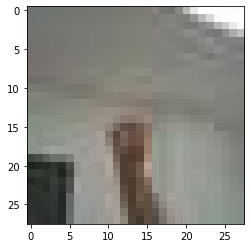

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1233])
print('라벨: ', y_train[113])

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_14 (Dense)            (

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
101/101 [==============================] - 1s 3ms/step - loss: 1.1497 - accuracy: 0.4132
Epoch 2/10
101/101 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.7762
Epoch 3/10
101/101 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.9407
Epoch 4/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9625
Epoch 5/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9822
Epoch 6/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9875
Epoch 7/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9860
Epoch 8/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9825
Epoch 9/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9903
Epoch 10/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9903

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("test_loss: {} ".format(train_loss))
print("test_accuracy: {}".format(train_accuracy))

101/101 - 0s - loss: 0.0377 - accuracy: 0.9919 - 188ms/epoch - 2ms/step
test_loss: 0.037692759186029434 
test_accuracy: 0.9918851256370544


In [ ]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/RSP/test/scissor_test'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/RSP/test/paper_test'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/RSP/test/rock_test'
resize_images(image_dir_path)
print("테스트 이미지 resize 완료!")

# [[YOUR CODE]]
image_dir_path = '/content/drive/MyDrive/RSP/test/scissor_test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_norm.shape))
print("y_train shape: {}".format(y_test.shape))

569  images to be resized.
569  images resized.
513  images to be resized.
513  images resized.
1070  images to be resized.
1070  images resized.
테스트 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (3204, 28, 28, 3)
y_train shape: (3204,)


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

101/101 - 0s - loss: 1.5566 - accuracy: 1.0000 - 187ms/epoch - 2ms/step
test_loss: 1.5565705299377441 
test_accuracy: 1.0


### 나중에 하기